<a href="https://colab.research.google.com/github/samy387/Arabian/blob/main/Neural_Network_phase_2_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
data_dir = '/content/drive/MyDrive/neural network/Gesture Image Data'
Name = os.listdir(data_dir)
print(Name)

['6', '8', '1', '5', '2', '3', '9', '0', '7', '4', 'J', 'B', 'G', 'I', 'E', 'F', 'C', 'D', 'A', 'H', 'Q', 'M', 'R', 'O', 'T', 'L', 'P', 'K', 'S', 'N', '_', 'X', 'Z', 'W', 'Y', 'U', 'V']


In [ ]:
# prompt: Use any model other than CNN that fit my data and there exit epochs and train and test (full model)

from google.colab import drive
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/neural network/Gesture Image Data'
Name = os.listdir(data_dir)

# Image preprocessing and data preparation
X = []
y = []
for i, name in enumerate(Name):
  path = os.path.join(data_dir, name)
  for img_name in os.listdir(path):
      img_path = os.path.join(path, img_name)
      img = Image.open(img_path).convert('L') # Convert to grayscale
      img = img.resize((64, 64)) # Resize for consistency
      img_array = np.array(img).flatten() # Flatten the image into a 1D array
      X.append(img_array)
      y.append(i)

X = np.array(X)
y = np.array(y)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier (example model)
model = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust hyperparameters

# Train the model with epochs (simulated)
epochs = 10
for epoch in range(epochs):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print(f"Epoch {epoch+1}/{epochs}, Training Accuracy: {train_accuracy}")


# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10, Training Accuracy: 1.0
Epoch 2/10, Training Accuracy: 1.0
Epoch 3/10, Training Accuracy: 1.0
Epoch 4/10, Training Accuracy: 1.0
Epoch 5/10, Training Accuracy: 1.0
Epoch 6/10, Training Accuracy: 1.0
Epoch 7/10, Training Accuracy: 1.0
Epoch 8/10, Training Accuracy: 1.0
Epoch 9/10, Training Accuracy: 1.0
Epoch 10/10, Training Accuracy: 1.0
Test Accuracy: 1.0


Test Accuracy: 1.0


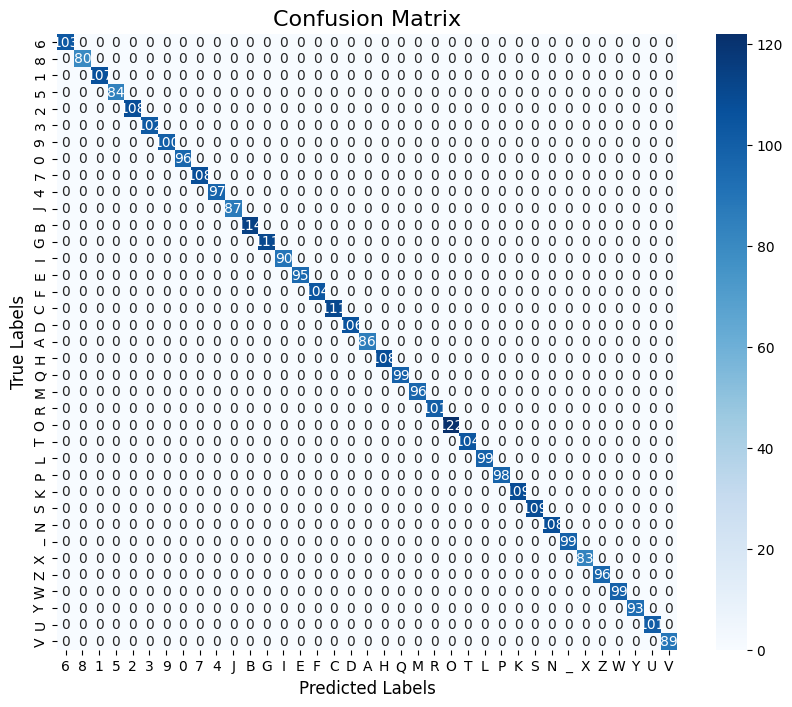

In [ ]:
# prompt: make big and clear confusion matrics

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (Your existing code) ...

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8)) # Adjust figure size for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=Name, yticklabels=Name) # Use class names for labels
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=16)
plt.show()

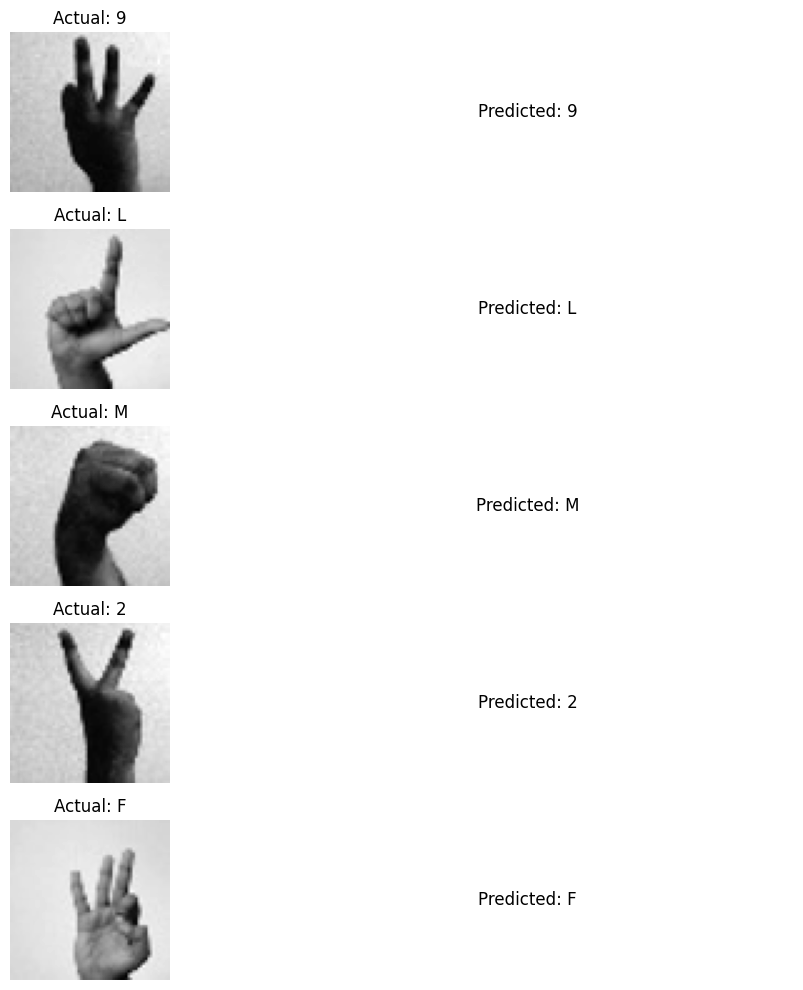

In [ ]:
# prompt: show images in actual and prection

import matplotlib.pyplot as plt
import numpy as np

# Assuming X_test, y_test, y_pred, and Name are defined as in your provided code

# Function to display actual and predicted images
def display_images(X_test, y_test, y_pred, Name):
    n_images = 5  # Number of images to display

    fig, axes = plt.subplots(n_images, 2, figsize=(10, 2 * n_images))
    for i in range(n_images):
        # Actual image
        img = X_test[i].reshape(64, 64) # Reshape to original dimensions
        axes[i, 0].imshow(img, cmap='gray')
        axes[i, 0].set_title(f"Actual: {Name[y_test[i]]}")
        axes[i, 0].axis('off')

        # Predicted image (we just show the prediction label)
        axes[i, 1].text(0.5, 0.5, f"Predicted: {Name[y_pred[i]]}", ha='center', va='center', fontsize=12)
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()


# Call the function to display the images
display_images(X_test, y_test, y_pred, Name)